In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Cleaned_EasyDinner_df.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant_Name   888 non-null    object 
 1   Restaurant_Style  888 non-null    object 
 2   Price_Per_Two     888 non-null    int64  
 3   Price_For_One     888 non-null    int64  
 4   Discount          888 non-null    object 
 5   Max_Discount      888 non-null    int64  
 6   Rating            888 non-null    float64
 7   Locality          888 non-null    object 
 8   City              888 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.head()

,Restaurant_Name,Restaurant_Style,Price_Per_Two,Price_For_One,Discount,Max_Discount,Rating,Locality,City
0,63 Degree Modern Regional Buffet,Regional Indian,2400,1200,25% Off,25,4.1,Gachibowli,Hyderabad
1,Golconda Pavilion,"North Indian, Multicuisine, Continental, Desse...",2500,1250,10% Off + 25% Off,25,4.4,ITC Kohenur,Hyderabad
2,Exotica,Multicuisine,1500,750,15% Off + 25% Off,25,4.3,Banjara Hills,Hyderabad
3,Forefathers,Multicuisine,1500,750,25% Off,25,4.6,"Road No. 45, Jubilee Hills",Hyderabad
4,Aster Cafe & Kitchen,Multicuisine,1000,500,10% Off + 25% Off,25,4.0,"Road No. 12, Banjara Hills",Hyderabad


In [5]:
df.dtypes

Restaurant_Name      object
Restaurant_Style     object
Price_Per_Two         int64
Price_For_One         int64
Discount             object
Max_Discount          int64
Rating              float64
Locality             object
City                 object
dtype: object

## Univariate Analysis

#### Univariate Analysis on Numerical Column 

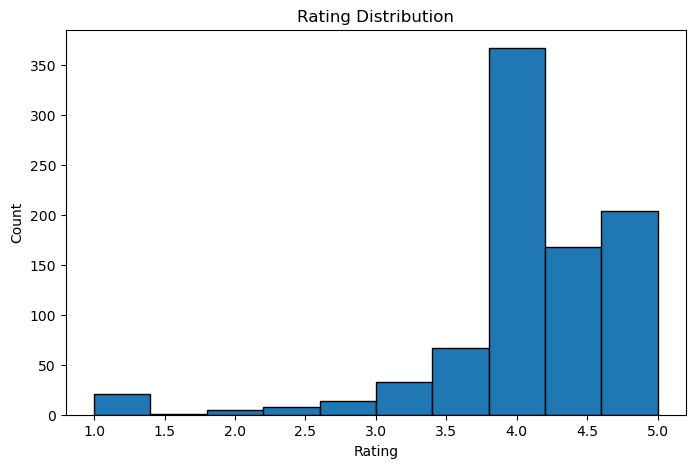

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


#### Univariate Analysis on Categorical Column 

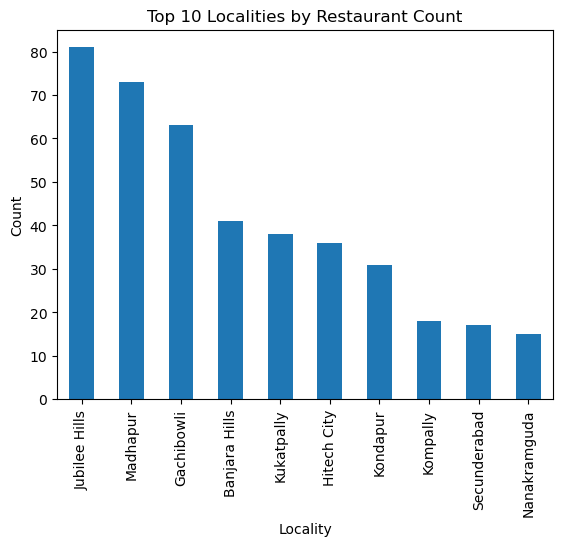

In [10]:
df['Locality'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Localities by Restaurant Count")
plt.xlabel("Locality")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis

#### Numerical vs Numerical 

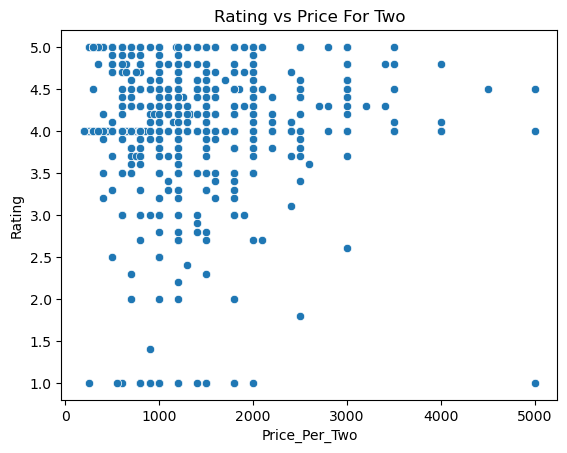

In [12]:
sns.scatterplot(x='Price_Per_Two', y='Rating', data=df)
plt.title("Rating vs Price For Two")
plt.show()


#### Numerical vs Categorical

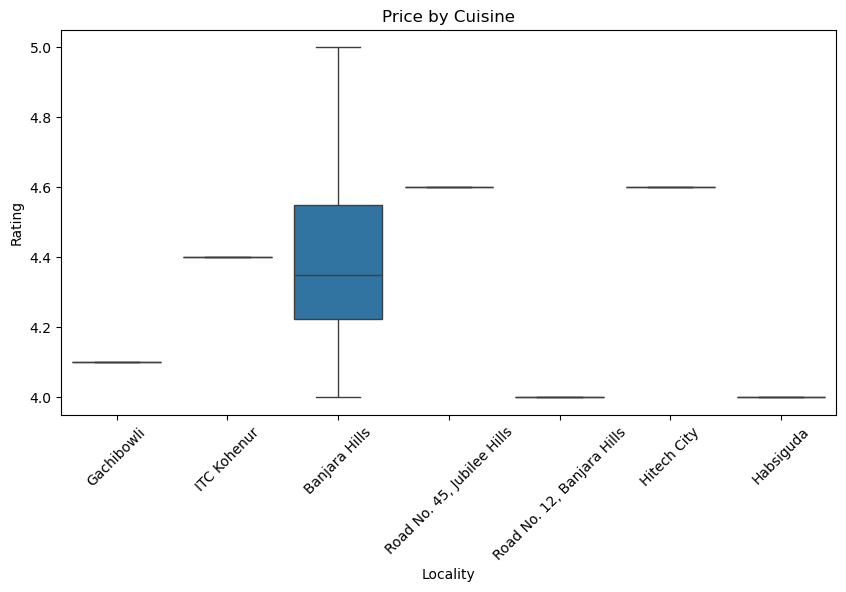

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Locality'].head(10), y=df['Rating'].head(10), data=df)
plt.title("Price by Cuisine")
plt.xticks(rotation=45)
plt.show()


#### Categorical vs Categorical

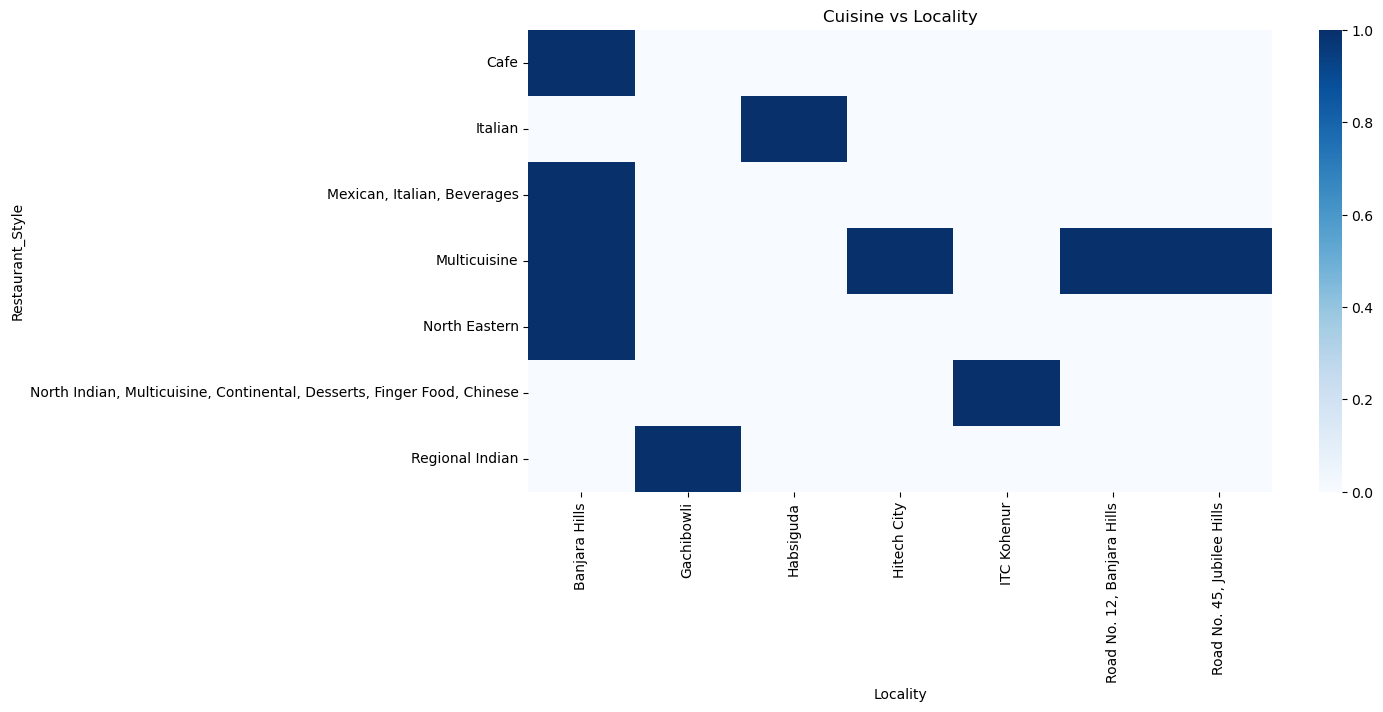

In [19]:
cross_tab = pd.crosstab(df['Restaurant_Style'].head(10), df['Locality'].head(10))
plt.figure(figsize=(12,6))
sns.heatmap(cross_tab, cmap='Blues')
plt.title("Cuisine vs Locality")
plt.show()


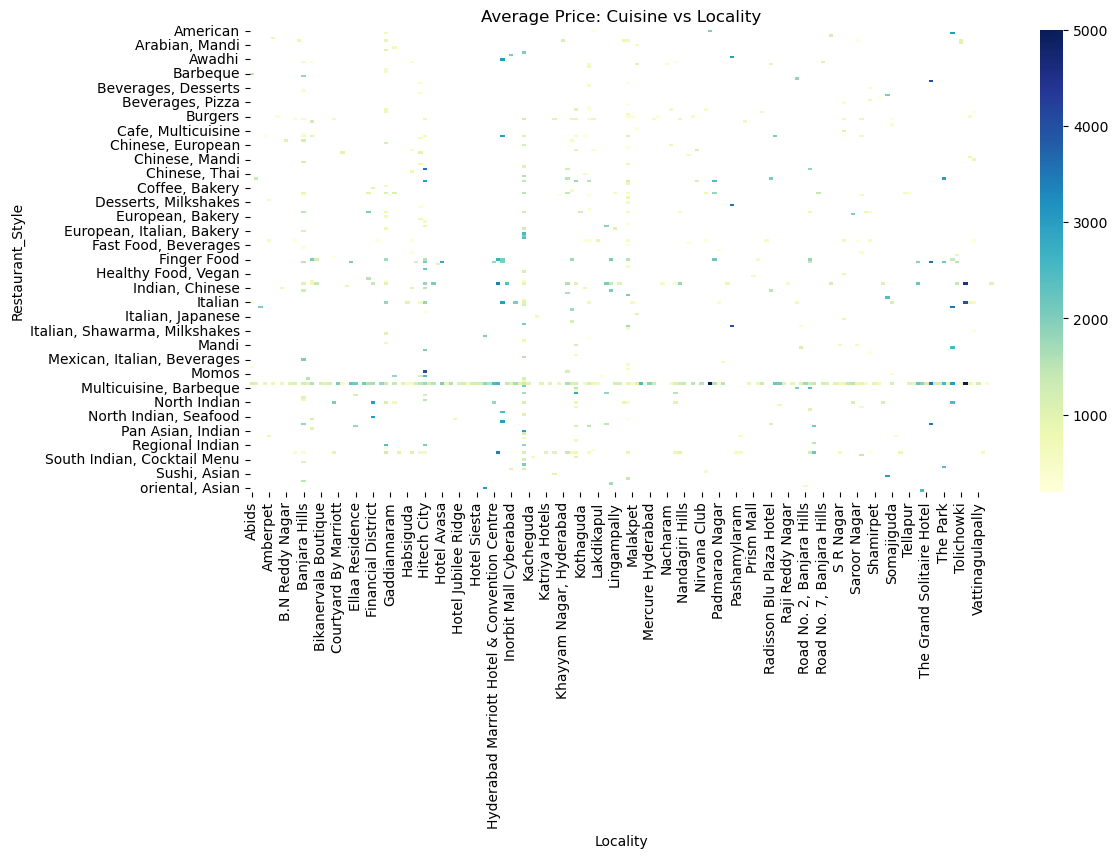

In [21]:
pivot = df.pivot_table(values='Price_Per_Two',
                       index='Restaurant_Style',
                       columns='Locality',
                       aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Average Price: Cuisine vs Locality")
plt.show()
